# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [10]:
from sklearn.metrics import  precision_score, f1_score,confusion_matrix, recall_score

In [27]:
### YOUR CODE HERE ###
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

x_train = pd.read_csv('x_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0,header=None, names=['index','value'])['value']
x_test = pd.read_csv('x_test.csv', index_col=0,)
y_test = pd.read_csv('y_test.csv', index_col=0,header=None, names=['index','value'])['value']



In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 8), (223, 8), (668,), (223,))

In [29]:
y_train

index
407    1
176    0
816    0
375    1
151    1
      ..
406    0
390    1
143    0
241    1
623    0
Name: value, Length: 668, dtype: int64

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
nn_predicted = knn_model.predict(x_test)
confusion_matrix(y_test, nn_predicted)

array([[104,  27],
       [ 60,  32]])

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [34]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [37]:
### YOUR CODE HERE ###

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

dtc = DecisionTreeClassifier()

dtc_model = dtc.fit(x_train, y_train)

lg = LogisticRegression()
lg_model = lg.fit(x_train, y_train)

nb_predicted = nb_model.predict(x_test)

dtc_predicted = dtc_model.predict(x_test)

lg_predicted = lg_model.predict(x_test)
print('knn')
print(classification_report(y_test, nn_predicted))
print('Naive Bayes')
print(classification_report(y_test, nb_predicted))
print('Tree')
print(classification_report(y_test, dtc_predicted))
print('Log reg')
print(classification_report(y_test, lg_predicted))

knn
              precision    recall  f1-score   support

           0       0.63      0.79      0.71       131
           1       0.54      0.35      0.42        92

    accuracy                           0.61       223
   macro avg       0.59      0.57      0.56       223
weighted avg       0.60      0.61      0.59       223

Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

Tree
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       131
           1       0.72      0.72      0.72        92

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

/Users/andreysergeev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print('knn')
print(precision_recall_fscore_support(y_test, nn_predicted))
print('Naive Bayes')
print(precision_recall_fscore_support(y_test, nb_predicted))
print('Tree')
print(precision_recall_fscore_support(y_test, dtc_predicted))
print('Log reg')
print(precision_recall_fscore_support(y_test, nn_predicted))


knn
(array([0.63414634, 0.54237288]), array([0.79389313, 0.34782609]), array([0.70508475, 0.42384106]), array([131,  92]))
Naive Bayes
(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92]))
Tree
(array([0.80152672, 0.7173913 ]), array([0.80152672, 0.7173913 ]), array([0.80152672, 0.7173913 ]), array([131,  92]))
Log reg
(array([0.63414634, 0.54237288]), array([0.79389313, 0.34782609]), array([0.70508475, 0.42384106]), array([131,  92]))


Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np



In [44]:
### YOUR CODE HERE ###
kfs = StratifiedKFold(n_splits=5, random_state=17,shuffle=True)

Cs = np.logspace(-1,2,500)

lg_cv = LogisticRegressionCV(Cs = Cs, cv = kfs, scoring='roc_auc')

model_lg_cv = lg_cv.fit(x_train, y_train)

/Users/andreysergeev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andreysergeev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [46]:
import matplotlib.pyplot as plt

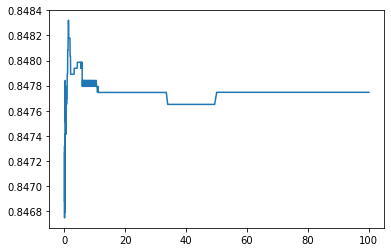

In [47]:
### YOUR CODE HERE ###

model_lg_cv.scores_[1]

plt.plot(Cs, [model_lg_cv.scores_[1][:,i].mean() for i in range(0,500)] )

plt.show()


### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [49]:
### YOUR CODE HERE ###


best_c = model_lg_cv.C_[0]
print(f'The best C {best_c}')
best_index = np.where(Cs ==best_c)[0][0]
last_index = best_index+15 
first_index = best_index-15

The best C 1.3876647909813085


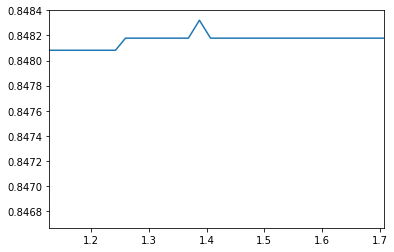

In [50]:
plt.plot(Cs, [model_lg_cv.scores_[1][:,i].mean() for i in range(0,500)] )

plt.xlim(Cs[first_index], Cs[last_index] )

plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

In [53]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

NameError: name 'logit_search' is not defined

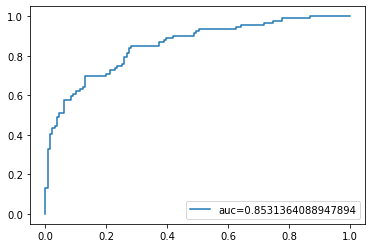

In [54]:
### YOUR CODE HERE ###

probas = model_lg_cv.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
